In [1]:
import gmsh
import numpy as np

el metodo initialize 'abre' el programa.

In [2]:
gmsh.initialize()

'armamos' el modelo que queremos modificar:

In [3]:
modelname = 'chapa_asimetrica'

In [4]:
gmsh.model.add(modelname)

In [5]:
lc = 1
L = 10

Definimos las coordenadas de los puntos

In [6]:
p1 = gmsh.model.geo.addPoint(0, 0, 0, lc*2)
p2 = gmsh.model.geo.addPoint(L, 0, 0, lc/2) 
p3 = gmsh.model.geo.addPoint(L, L, 0, lc*5) 
p4 = gmsh.model.geo.addPoint(0, L, 0, lc/5) 

Luego definimos las lineas

In [7]:
l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p1)

Las curvas nos van a servir para definir los bordes de nuestro modelo.

In [8]:
C1 = gmsh.model.geo.addCurveLoop([l1, l2, l3, l4])

Y las superficies:

In [9]:
S1 = gmsh.model.geo.addPlaneSurface([C1])

le avisamos que ya estan todos los elementos geométricos:

In [10]:
gmsh.model.geo.synchronize()

Ahora definimos algo que nos va a servir para las condiciones de contorno.

Y definimos `Grupos Físicos` para definir bordes, etc

In [11]:
Empotrado = gmsh.model.addPhysicalGroup(1, [l4])
gmsh.model.setPhysicalName(1,Empotrado,'Empotrado')

In [12]:
Traccionado = gmsh.model.addPhysicalGroup(1, [l2])
gmsh.model.setPhysicalName(1,Traccionado,'Traccionado')

In [13]:
Superficie = gmsh.model.addPhysicalGroup(2,[S1])
gmsh.model.setPhysicalName(2,Superficie, 'Superficie')

Finalemente generamos el mallado

In [14]:
gmsh.model.mesh.generate(2)

# El objeto mesh

El mallado es un objeto del cual podemos recuperar la información necesaria para interactuar con nuestro motor de elementos finitos. Por ejemplo para la informacion de los nodos:

In [15]:
NodeInfo = gmsh.model.mesh.get_nodes()

In [16]:
NodeInfo[1].shape

(393,)

In [17]:
NodeInfo

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131], dtype=uint64),
 array([ 0.        ,  0.        ,  0.        , 10.        ,  0.        ,
         0.        , 10.        , 10.        ,  0.        ,  0.        ,
        10.        ,  0.        ,  1.72599223,  0.        ,  0.        ,
         3.22855602,  

esta variable node info guarda:
- los numeros de nodo
- la matriz de nodo

In [18]:
NumeroNodos = NodeInfo[0].shape[0]

In [19]:
NumeroNodos

131

es la cantidad de nodos del modelo.

La matriz de nodos es dada en lista, nos conviene pasarla a matriz para tener lo que venimos trabajando:

In [20]:
MN = NodeInfo[1].reshape(NumeroNodos , 3)

In [21]:
MN

array([[ 0.        ,  0.        ,  0.        ],
       [10.        ,  0.        ,  0.        ],
       [10.        , 10.        ,  0.        ],
       [ 0.        , 10.        ,  0.        ],
       [ 1.72599223,  0.        ,  0.        ],
       [ 3.22855602,  0.        ,  0.        ],
       [ 4.53661385,  0.        ,  0.        ],
       [ 5.6753442 ,  0.        ,  0.        ],
       [ 6.66666657,  0.        ,  0.        ],
       [ 7.52966285,  0.        ,  0.        ],
       [ 8.28094471,  0.        ,  0.        ],
       [ 8.93497358,  0.        ,  0.        ],
       [ 9.50433881,  0.        ,  0.        ],
       [10.        ,  0.50029986,  0.        ],
       [10.        ,  1.17162497,  0.        ],
       [10.        ,  2.07243965,  0.        ],
       [10.        ,  3.28119385,  0.        ],
       [10.        ,  4.90315555,  0.        ],
       [10.        ,  7.07957764,  0.        ],
       [ 7.08844419, 10.        ,  0.        ],
       [ 4.97772207, 10.        ,  0.   

## Elementos

In [22]:
ElementInfo = gmsh.model.mesh.get_elements()

Este Objeto tiene mucha información:

In [23]:
ElementInfo

(array([ 1,  2, 15], dtype=int32),
 [array([246, 247, 248, 249, 250, 251, 252, 253, 254, 255,   1,   2,   3,
           4,   5,   6,   7, 256, 257, 258, 259, 260, 261, 262, 263, 264,
           8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20],
        dtype=uint64),
  array([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
          34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
          47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
          60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
          73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
          86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
          99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
         125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
         138, 139, 140, 141, 142, 143, 144, 145, 146,

- los tipos de elementos

In [24]:
ElementInfo[0]

array([ 1,  2, 15], dtype=int32)

Las etiquetas de los triángulos

In [25]:
ElementInfo[1][1]

array([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 20

In [26]:
ElementInfo[2][1].shape

(663,)

In [27]:
ETYPES = ElementInfo[0]

Podemos ser un poco más precabios y tomar solo los triángulos, que son los que nos interesan para la guía 

In [28]:
ETAGS, ELEMENTS = gmsh.model.mesh.get_elements_by_type(2)

In [29]:
ETAGS

array([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 20

In [30]:
ELEMENTS

array([ 84,  63,  98,  43,  72,  74,  49,  21,  55,  19,  79,  80,   7,
        41,  76,  70,  72, 115,  63,  84, 106,  19,   3,  79,  77,  66,
       103,  72,  43, 115,  20,  21,  49,   1,   5, 102,  80,  79, 101,
        78,  84,  98,  84,  78,  89,  76,  77, 103,  76,  41,  77,   6,
         7,  76,  39,   1, 102,   3,  20,  79,  49,  55,  56,  51,   6,
        76,  83,  84,  89,  43,  74, 104,  36,  37,  90,  78,  41,  88,
        56,  55,  57,  81,  82,  83,  18,  19, 125,   5,   6,  51,  19,
        80, 125,  17,  18,  46,  40,  36,  90,  68,  25, 130,  21,  22,
       123,  50,  25,  68,   7,   8,  41,  37,  38,  44,  17,  46,  81,
        77,  41,  78,  66,  77, 131,  56,  57,  58,  55,  21, 123,  41,
         8,  88,  65,  61,  87,  15,  16,  53,   5,  51, 102,  78,  88,
        89,  83,  89, 105,  43,  23, 115,  83,  82,  84,  22,  23,  43,
        14,  15,  54,  24,  25,  50,  37,  44,  90,  15,  53,  54,  60,
        58,  61,  16,  17, 129, 104,  74, 119,  58,  57,  87,  9

la matriz de conectividad también hay que reformatear para tener lo que estamos acostumbrados.

In [31]:
MC = ELEMENTS.reshape([ETAGS.shape[0],3])

In [32]:
MC

array([[ 84,  63,  98],
       [ 43,  72,  74],
       [ 49,  21,  55],
       [ 19,  79,  80],
       [  7,  41,  76],
       [ 70,  72, 115],
       [ 63,  84, 106],
       [ 19,   3,  79],
       [ 77,  66, 103],
       [ 72,  43, 115],
       [ 20,  21,  49],
       [  1,   5, 102],
       [ 80,  79, 101],
       [ 78,  84,  98],
       [ 84,  78,  89],
       [ 76,  77, 103],
       [ 76,  41,  77],
       [  6,   7,  76],
       [ 39,   1, 102],
       [  3,  20,  79],
       [ 49,  55,  56],
       [ 51,   6,  76],
       [ 83,  84,  89],
       [ 43,  74, 104],
       [ 36,  37,  90],
       [ 78,  41,  88],
       [ 56,  55,  57],
       [ 81,  82,  83],
       [ 18,  19, 125],
       [  5,   6,  51],
       [ 19,  80, 125],
       [ 17,  18,  46],
       [ 40,  36,  90],
       [ 68,  25, 130],
       [ 21,  22, 123],
       [ 50,  25,  68],
       [  7,   8,  41],
       [ 37,  38,  44],
       [ 17,  46,  81],
       [ 77,  41,  78],
       [ 66,  77, 131],
       [ 56,  57

# Condiciones de contorno

Con las definiciones de los Physical Groups, podemos sacar los índices de los nodos que estan empotrados o traccionados. Necesitamos definir una 'entidad' para los elements Traccionados:

In [33]:
entityTraccionada = gmsh.model.getEntitiesForPhysicalGroup(1, Traccionado)

con esa entidad, podemos definir los elementos tipo línea:

In [34]:
Tgroup, Ttraccionada, Ltraccionada = gmsh.model.mesh.getElements(1, entityTraccionada[0])

In [35]:
Ttraccionada

[array([1, 2, 3, 4, 5, 6, 7], dtype=uint64)]

In [36]:
Ltraccionada = Ltraccionada[0].reshape(Ttraccionada[0].shape[0],2)

In [37]:
Ltraccionada 

array([[ 2, 14],
       [14, 15],
       [15, 16],
       [16, 17],
       [17, 18],
       [18, 19],
       [19,  3]], dtype=uint64)

Con los elementos líneas traccionadas podemos calcular las longitudes y distribuir la fuerza externa. 

In [38]:
Longitudes = np.abs( MN[Ltraccionada[:,0]-1,1] - MN[Ltraccionada[:,1]-1,1] )

Ahora puedo calcular las fuerzas:

In [39]:
Fuerzas = np.zeros((2*NumeroNodos,1))
espesor = 1
tension = 1000 #Pa

for l, linea in enumerate(Ltraccionada):
    Flocal = np.array([[1],[1]])*tension*espesor*Longitudes[l]/2
    n1 = linea[0]
    n2 = linea[1]
    #print(Flocal)
    Fuerzas[ np.array([2*(n1-1), 2*(n2-1)], dtype=int)] += Flocal
    print(Fuerzas[ np.array([2*(n1-1), 2*(n2-1)], dtype=int)])
    print(Flocal )
    print('======')
Desplazamientos = np.zeros((2*NumeroNodos,1))

[[250.14993235]
 [250.14993235]]
[[250.14993235]
 [250.14993235]]
[[585.81248489]
 [335.66255254]]
[[335.66255254]
 [335.66255254]]
[[786.06989411]
 [450.40734157]]
[[450.40734157]
 [450.40734157]]
[[1054.78443843]
 [ 604.37709686]]
[[604.37709686]
 [604.37709686]]
[[1415.35795065]
 [ 810.98085379]]
[[810.98085379]
 [810.98085379]]
[[1899.19189446]
 [1088.21104067]]
[[1088.21104067]
 [1088.21104067]]
[[2548.42222289]
 [1460.21118221]]
[[1460.21118221]
 [1460.21118221]]


In [40]:
Ltraccionada

array([[ 2, 14],
       [14, 15],
       [15, 16],
       [16, 17],
       [17, 18],
       [18, 19],
       [19,  3]], dtype=uint64)

In [41]:
Fuerzas

array([[   0.        ],
       [   0.        ],
       [ 250.14993235],
       [   0.        ],
       [1460.21118221],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [ 585.81248489],
       [   0.        ],
       [ 786.06989411],
       [   0.        ],
       [1054.78443843],
       [   0.        ],
       [1415.35795065],
       [   0.        ],
       [1899.19189446],
       [   0.        ],
       [2548.42222289],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.   

In [42]:
gmsh.fltk.run()

# Empotrados

Para definir los nodos empotrados necesito solamente los índices de los nodos en dicho physical group

In [43]:
NodosEmpotrados = gmsh.model.mesh.get_nodes_for_physical_group(1,Empotrado)

In [44]:
NodosEmpotrados[0]

array([ 1,  4, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
      dtype=uint64)

Con eso ya puedo calcular los valores de los índices de los nodos que resultarán empotrados.

In [45]:
s = []
for n, nodo in enumerate(NodosEmpotrados[0]):
    s.append(
        np.linspace(2*(nodo-1), 2*(nodo-1) +1, 2)
    )
s = np.array(s).astype(int).ravel()

In [46]:
s

array([ 0,  1,  6,  7, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

In [47]:
Desplazamientos[2*(NodosEmpotrados[0]-1)] = 0
Desplazamientos[2*(NodosEmpotrados[0]-1)+1] = 0

luego saco de r todo lo que puse en s:

In [48]:
r = np.arange(2*NumeroNodos)

In [49]:
r = np.delete( r, s )

In [50]:
Fuerzas[2*(Ltraccionada.ravel()-1)]

array([[ 250.14993235],
       [ 585.81248489],
       [ 585.81248489],
       [ 786.06989411],
       [ 786.06989411],
       [1054.78443843],
       [1054.78443843],
       [1415.35795065],
       [1415.35795065],
       [1899.19189446],
       [1899.19189446],
       [2548.42222289],
       [2548.42222289],
       [1460.21118221]])

# Nos divertimos un rato

In [51]:
import matplotlib.pyplot as plt
from matplotlib import quiver

In [52]:
plt.style.use('default')
plt.rc('figure',figsize=(15,10))

In [53]:
Fx = Fuerzas[2*np.arange(NumeroNodos)]
Fy = Fuerzas[2*np.arange(NumeroNodos)+1]

(-1.0, 15.096844445772167)

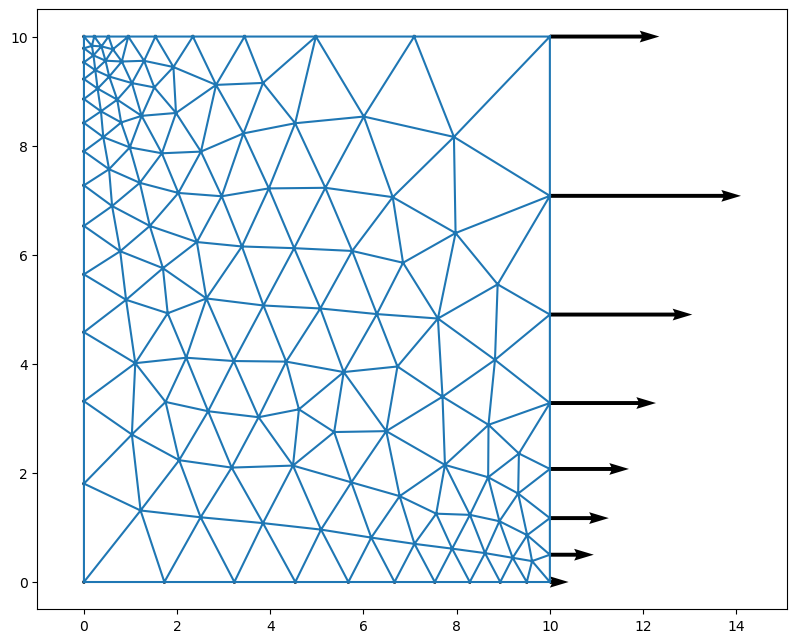

In [54]:
#plt.plot(MN[:,0],MN[:,1],'ok')

#plt.plot(MNE[:,0], MNE[:,1], label='Empotrados', lw = 5)
#plt.plot(MNT[:,0], MNT[:,1], label='Traccionados', lw = 5)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.2, 0.5, 0.6])
ax.triplot(MN[:,0],MN[:,1],MC-MC.min(), )
#ax.plot(MN[:,0],MN[:,1],'o')
ax.quiver( MN[:,0], MN[:,1], Fx, Fy, linewidth=5, units='width', scale=10000)
ax.set_xlim(-1, L+(Fx/500).max())

# Agregar Resulatados

In [55]:
import mefmods as mef

In [56]:
ETYPES = 2*np.ones(len(MC)).astype(int)

nu = 0.3

E = 210E9

MP = np.hstack(
        (
            np.ones((len(MC), 1)),
            np.ones((len(MC), 1))*nu,
            np.ones((len(MC), 1))*E
            )
        )

In [57]:
K = mef.ensamble(MC-1, MN-1, MP, 2, ETYPES, 'Chapa-Asimetrica-2021')

In [58]:
s

array([ 0,  1,  6,  7, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77])

In [59]:
Fuerzas

array([[   0.  ],
       [   0.  ],
       [ 250.15],
       [   0.  ],
       [1460.21],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [ 585.81],
       [   0.  ],
       [ 786.07],
       [   0.  ],
       [1054.78],
       [   0.  ],
       [1415.36],
       [   0.  ],
       [1899.19],
       [   0.  ],
       [2548.42],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [   0.  ],
       [  

In [60]:
r

array([  2,   3,   4,   5,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212

In [61]:
#Desplazamientos[r] = 
Desplazamientos, FResultado = mef.resolvermef(r,s,K,Desplazamientos[s], Fuerzas[r], 'Chapa-Asimetrica-2021')

In [62]:
Exy = np.hstack( (Fuerzas.reshape(NumeroNodos, 2) , np.zeros((NumeroNodos, 1))) )

In [63]:
Rxy = np.hstack( (FResultado.reshape(NumeroNodos, 2) , np.zeros((NumeroNodos, 1))) )

In [64]:
Dxy = np.hstack( (Desplazamientos.reshape(NumeroNodos, 2) , np.zeros((NumeroNodos, 1))) )

# Guardo los resultados 

In [65]:
fext = gmsh.view.add('FuerzasExternas')
Fext = gmsh.view.addModelData(fext,0,modelname,'NodeData',NodeInfo[0],Exy)

In [66]:
despview = gmsh.view.add('Desplazamientos')
Desp = gmsh.view.addModelData(despview,0,modelname,'NodeData',NodeInfo[0],Dxy)

In [67]:
forview = gmsh.view.add('Fuerzas')
Fza = gmsh.view.addModelData(forview,0,modelname,'NodeData',NodeInfo[0], Rxy)

In [68]:
gmsh.fltk.run()

In [69]:
gmsh.finalize()